In [61]:
import graphviz

dot = graphviz.Digraph('Test network')  # directed graph
print(dot.body)

# define nodes
dot.attr('node', shape='rectangle', color="lightblue2", style="filled")
dot.node("S1", "Species1")

with dot.subgraph(name="mets") as mets_subgraph:
    mets_subgraph.attr(rank="same")
    mets_subgraph.attr('node', shape='circle', color="green", style="filled")
    mets_subgraph.node("A")
    mets_subgraph.node("B")
    mets_subgraph.node("C")
    mets_subgraph.node("D")
    # mets_subgraph.node("A", label="", xlabel="met1")
    # mets_subgraph.node("B", label="",xlabel="met2")
    # mets_subgraph.node("C", label="",xlabel="met3")
    # mets_subgraph.node("D", label="",xlabel="met4")
    
with dot.subgraph(name="members") as members_subgraph:
    members_subgraph.attr(rank="same")
    members_subgraph.attr('node', shape='rectangle', color="lightblue2", style="filled")
    members_subgraph.node("S2", "Species2")

# # define nodes
# dot.attr('node', shape='rectangle', color="green", style="filled")
# dot.node("A", "met1")
# dot.node("B", "met2")
# dot.node("C", "met3")
# dot.node("D", "met4")

# dot.attr('node', shape='circle', color="lightblue2", style="filled")
# dot.node("S1", "Species1")
# dot.node("S2", "Species2")

# define edges
# dot.edges(['S1A', 'AS2', "S2B", "BS1"])
# dot.subgraph(body=["""
#     S1 -> A [arrowsize=13/543]
#     A -> S2 [arrowsize=132/543]
#     S2 -> B [arrowsize=14/543]
#     B -> S1 [arrowsize=1/543]
#     S1 -> C [arrowsize=54/543]
#     C -> S2 [arrowsize=343/543]
#     S2 -> D [arrowsize=543/543]
#     D -> S1 [arrowsize=321/543]
# """])
# print(dot.body)
# dot.body.extend([f"\tS1 -> A [arrowsize={131/543}]\n", f"\tA -> S2 [arrowsize={132/543}]\n", f"\tS2 -> B [arrowsize={141/543}]\n", f"\tB -> S1 [arrowsize={121/543}]\n",
#                  f"\tS1 -> C [arrowsize={54/543}]\n", f"\tC -> S2 [arrowsize={343/543}]\n", f"\tS2 -> D [arrowsize={543/543}]\n", f"\tD -> S1 [arrowsize={321/543}]\n"])
dot.edge('S1', 'A', arrowsize=f"{131/543}")
dot.edge('A', 'S2', arrowsize=f"{132/543}")
dot.edge('S2', 'B', arrowsize=f"{142/543}")
dot.edge('B', 'S1', arrowsize=f"{121/543}")
dot.edge('S1', 'C', arrowsize=f"{54/543}")
dot.edge('C', 'S2', arrowsize=f"{343/543}")
dot.edge('S2', 'D', arrowsize="1")
dot.edge('D', 'S1', arrowsize=f"{321/543}")

# final stylistic adjustments
dot.attr(overlap='false')

# view the diagram source
print(dot.source)

# render and export the source
dot.render('test_network.gv', view=True)  # doctest: +SKIP
# dot.view()

[]
digraph "Test network" {
	node [color=lightblue2 shape=rectangle style=filled]
	S1 [label=Species1]
	subgraph mets {
		rank=same
		node [color=green shape=circle style=filled]
		A
		B
		C
		D
	}
	subgraph members {
		rank=same
		node [color=lightblue2 shape=rectangle style=filled]
		S2 [label=Species2]
	}
	S1 -> A [arrowsize=0.24125230202578268]
	A -> S2 [arrowsize=0.2430939226519337]
	S2 -> B [arrowsize=0.26151012891344383]
	B -> S1 [arrowsize=0.22283609576427257]
	S1 -> C [arrowsize=0.09944751381215469]
	C -> S2 [arrowsize=0.6316758747697975]
	S2 -> D [arrowsize=1]
	D -> S1 [arrowsize=0.5911602209944752]
	overlap=false
}



'test_network.gv.pdf'

In [33]:
print("""digraph "Test network" {
	node [color=lightblue2 shape=circle style=filled]
	S1 [label=Species1]
	subgraph mets {
		rank=same
		node [color=green shape=rectangle style=filled]
		A [label=met1]
		B [label=met2]
		C [label=met3]
		D [label=met4]
	}
	subgraph members {
		rank=same
		node [color=lightblue2 shape=circle style=filled]
		S2 [label=Species2]
	}
	overlap=false
}""")



digraph "Test network" {
	node [color=lightblue2 shape=circle style=filled]
	S1 [label=Species1]
	subgraph mets {
		rank=same
		node [color=green shape=rectangle style=filled]
		A [label=met1]
		B [label=met2]
		C [label=met3]
		D [label=met4]
	}
	subgraph members {
		rank=same
		node [color=lightblue2 shape=circle style=filled]
		S2 [label=Species2]
	}
	overlap=false
}


In [ ]:
digraph "Test network" {
	node [color=lightblue2 shape=circle style=filled]
	S1 [label=Species1]
	subgraph mets {
		rank=same
		node [color=green shape=rectangle style=filled]
		A [label=met1]
		B [label=met2]
		C [label=met3]
		D [label=met4]
	}
	subgraph members {
		rank=same
		node [color=lightblue2 shape=circle style=filled]
		S2 [label=Species2]
	}

     S1 -> A [arrowsize=13/543]
     A -> S2 [arrowsize=132/543]
     S2 -> B [arrowsize=14/543]
     B -> S1 [arrowsize=1/543]
     S1 -> C [arrowsize=54/543]
     C -> S2 [arrowsize=343/543]
     S2 -> D [arrowsize=543/543]
     D -> S1 [arrowsize=321/543]

	overlap=false
}


In [67]:
from pandas import read_csv, concat, merge

cross_feeding_df = read_csv("cross_feeding.csv")

In [79]:
cross_feeding_rows = []
for index, row in cross_feeding_df.iterrows():
    positive = negative = False
    for col, val in row.items():
        if "Species" in col:
            if val > 1e-4:  positive = True
            elif val < -1e-4:  negative = True
        if negative and positive:  cross_feeding_rows.append(row)  ;  break
metabolites_df = concat(cross_feeding_rows, axis=1).T
metabolites_df.index = metabolites_df["Metabolite/Donor ID"]
metabolites_df = metabolites_df.drop(["Metabolite/Donor ID"], axis=1)
display(metabolites_df)
metabolites = metabolites_df.index.tolist()
print(metabolites)
# define the community members that participate in cross-feeding
members = metabolites_df.loc[:, (metabolites_df != 0).any(axis=0)].columns.tolist()
members.remove("Environment")
print(members)

,Environment,Species1,Species2
Metabolite/Donor ID,,,
cpd00001_e0,0.0,623.766026,-422.643669
cpd00009_e0,-855.401716,1000.0,-144.598284
cpd00020_e0,0.0,1000.0,-1000.0
cpd00039_e0,2.020597,26.970192,-28.990789
cpd00054_e0,0.0,-121.452199,121.452199
cpd00065_e0,-993.788937,998.582955,-4.794019
cpd00107_e0,0.0,-11.23133,11.23133
cpd00119_e0,148.361772,11.981715,-160.343487
cpd00132_e0,0.0,20.397417,-20.397417


['cpd00001_e0', 'cpd00009_e0', 'cpd00020_e0', 'cpd00039_e0', 'cpd00054_e0', 'cpd00065_e0', 'cpd00107_e0', 'cpd00119_e0', 'cpd00132_e0', 'cpd00221_e0']
['Environment', 'Species1', 'Species2']


In [110]:
# TODO define a third tier of just the environment as a rectangle that spans the width of the members
members_cluster1, members_cluster2 = members[:int(len(members)/2)], members[int(len(members)/2):]

import graphviz
import re

dot = graphviz.Digraph('Test network', format="svg")  # directed graph

# define nodes
dot.attr('node', shape='rectangle', color="lightblue2", style="filled")
for mem in members_cluster1:
    index = members.index(mem)
    dot.node(f"S{index}", mem)

mets_dict = {}
with dot.subgraph(name="mets") as mets_subgraph:
    mets_subgraph.attr(rank="same")
    mets_subgraph.attr('node', shape='circle', color="green", style="filled")
    metNum = ord("A")
    for metIndex, metID in enumerate(metabolites):
        # letter = chr(metNum+metIndex)
        cpdNum = str(int(metID.replace("cpd", "").replace("_e0", "")))
        mets_subgraph.node(cpdNum, fixedsize="true", height="0.5", URL=f"https://modelseed.org/biochem/compounds/{metID.replace('_e0', '')}", tooltip=metID.replace('_e0', ''))
        # mets_dict[metID] = letter
    # for metID in metabolites:
    #     mets_subgraph.node(metID)
    
with dot.subgraph(name="members") as members_subgraph:
    members_subgraph.attr(rank="same")
    for mem in members_cluster2:
        index = members.index(mem)
        dot.node(f"S{index}", mem)

# define the edges by parsing the interaction DataFrame
for metID, row in metabolites_df.iterrows():
    cpdNum = str(int(metID.replace("cpd", "").replace("_e0", "")))
    for col, val in row.items():
        if col == "Environment":  continue
        index = members.index(col)
        if val > 0:  dot.edge(f"S{index}", cpdNum, arrowsize=f"{val/500}", edgetooltip=str(val))  # creates a range of arrowhead sizes 0 < size <= 2
        if val < 0:  dot.edge(cpdNum, f"S{index}", arrowsize=f"{abs(val/500)}", edgetooltip=str(val))  # creates a range of arrowhead sizes 0 < size <= 2

# final stylistic adjustments
dot.attr(overlap='false')

# view the diagram source
print(dot.source)

# render and export the source
dot.render('test_network', view=True)  # doctest: +SKIP
# dot.view()

digraph "Test network" {
	node [color=lightblue2 shape=rectangle style=filled]
	S0 [label=Species1]
	subgraph mets {
		rank=same
		node [color=green shape=circle style=filled]
		1 [URL="https://modelseed.org/biochem/compounds/cpd00001" fixedsize=true height=0.5 tooltip=cpd00001]
		9 [URL="https://modelseed.org/biochem/compounds/cpd00009" fixedsize=true height=0.5 tooltip=cpd00009]
		20 [URL="https://modelseed.org/biochem/compounds/cpd00020" fixedsize=true height=0.5 tooltip=cpd00020]
		39 [URL="https://modelseed.org/biochem/compounds/cpd00039" fixedsize=true height=0.5 tooltip=cpd00039]
		54 [URL="https://modelseed.org/biochem/compounds/cpd00054" fixedsize=true height=0.5 tooltip=cpd00054]
		65 [URL="https://modelseed.org/biochem/compounds/cpd00065" fixedsize=true height=0.5 tooltip=cpd00065]
		107 [URL="https://modelseed.org/biochem/compounds/cpd00107" fixedsize=true height=0.5 tooltip=cpd00107]
		119 [URL="https://modelseed.org/biochem/compounds/cpd00119" fixedsize=true height=0.5 to

'test_network.svg'

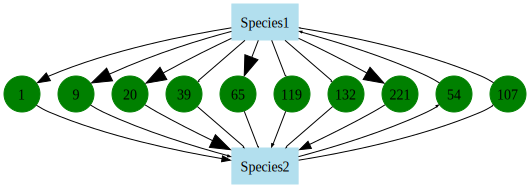

In [115]:
from IPython.display import SVG, display
display(SVG("test_network.svg"))

In [113]:
%%HTML

<img src="test_network.svg" style="height:500px">

In [91]:
mets_dict

{'cpd00001_e0': 'A',
 'cpd00009_e0': 'B',
 'cpd00020_e0': 'C',
 'cpd00039_e0': 'D',
 'cpd00054_e0': 'E',
 'cpd00065_e0': 'F',
 'cpd00107_e0': 'G',
 'cpd00119_e0': 'H',
 'cpd00132_e0': 'I',
 'cpd00221_e0': 'J'}

In [122]:
%run ../../../modelseedpy/community/mssteadycom.py


dot_code = MSSteadyCom.visual_interactions(cross_feeding_df)

In [121]:
(dot_code)

'digraph "Test network" {\n\tnode [color=lightblue2 shape=rectangle style=filled]\n\tS0 [label=Species1]\n\tsubgraph mets {\n\t\trank=same\n\t\tnode [color=green shape=circle style=filled]\n\t\t1 [URL="https://modelseed.org/biochem/compounds/cpd00001" fixedsize=true height=0.5 tooltip=cpd00001]\n\t\t9 [URL="https://modelseed.org/biochem/compounds/cpd00009" fixedsize=true height=0.5 tooltip=cpd00009]\n\t\t20 [URL="https://modelseed.org/biochem/compounds/cpd00020" fixedsize=true height=0.5 tooltip=cpd00020]\n\t\t39 [URL="https://modelseed.org/biochem/compounds/cpd00039" fixedsize=true height=0.5 tooltip=cpd00039]\n\t\t54 [URL="https://modelseed.org/biochem/compounds/cpd00054" fixedsize=true height=0.5 tooltip=cpd00054]\n\t\t65 [URL="https://modelseed.org/biochem/compounds/cpd00065" fixedsize=true height=0.5 tooltip=cpd00065]\n\t\t107 [URL="https://modelseed.org/biochem/compounds/cpd00107" fixedsize=true height=0.5 tooltip=cpd00107]\n\t\t119 [URL="https://modelseed.org/biochem/compounds/c